In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import statistics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [63]:
shower_dp = 'data/Showerthoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
shower_data = shower_data.append(pd.read_csv('data/worldnews.csv', header=0))
shower_data = shower_data.append(pd.read_csv('data/todayilearned.csv', header=0))
shower_data = shower_data.append(pd.read_csv('data/movies.csv', header=0))
shower_data = shower_data.append(pd.read_csv('data/Jokes.csv', header=0))



# shower_data.head()
shower_data

/tmp/ipykernel_1134781/4221653507.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/worldnews.csv', header=0))
/tmp/ipykernel_1134781/4221653507.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/todayilearned.csv', header=0))
/tmp/ipykernel_1134781/4221653507.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/movies.csv', header=0))
/tmp/ipykernel_1134781/4221653507.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/Jokes.csv', he

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.335629e+09,651,self.Jokes,sww0e,My wife told me a joke that I actually laughed...,1058,407,66,http://www.reddit.com/r/Jokes/comments/sww0e/m...,A women was in bed with her husbands best frie...,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_sww0e,http://www.reddit.com/r/Jokes/comments/sww0e/m...,NaN
996,1.371479e+09,649,self.Jokes,1gim8s,I once knew a soldier who suffered through bot...,812,163,19,http://www.reddit.com/r/Jokes/comments/1gim8s/...,He was a seasoned veteran.,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_1gim8s,http://www.reddit.com/r/Jokes/comments/1gim8s/...,NaN
997,1.359162e+09,648,self.Jokes,17agcg,Golf with the boss,898,250,33,http://www.reddit.com/r/Jokes/comments/17agcg/...,A man and his boss skip work one weekday after...,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_17agcg,http://www.reddit.com/r/Jokes/comments/17agcg/...,NaN
998,1.363655e+09,645,self.Jokes,1ak9w3,What would it be like to have world with out w...,938,293,42,http://www.reddit.com/r/Jokes/comments/1ak9w3/...,It would be a real pain in the ass,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_1ak9w3,http://www.reddit.com/r/Jokes/comments/1ak9w3/...,NaN


In [64]:
shower_data = shower_data.drop(['domain', 'score', 'domain', 'permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'selftext','thumbnail', 'name', 'url', 'subreddit_id', 'edited', 'is_self', 'link_flair_text','distinguished','author_flair_css_class' ], axis='columns')

shower_data["engagement"] = shower_data["ups"] + shower_data["downs"] + shower_data["num_comments"]

In [65]:
shower_data

,created_utc,id,title,ups,downs,num_comments,engagement
0,1.372964e+09,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,6980
1,1.372606e+09,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,5696
2,1.361920e+09,19aft0,A TV channel where all the shows are set in th...,2558,171,77,2806
3,1.370793e+09,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,3151
4,1.371846e+09,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,3443
...,...,...,...,...,...,...,...
995,1.335629e+09,sww0e,My wife told me a joke that I actually laughed...,1058,407,66,1531
996,1.371479e+09,1gim8s,I once knew a soldier who suffered through bot...,812,163,19,994
997,1.359162e+09,17agcg,Golf with the boss,898,250,33,1181
998,1.363655e+09,1ak9w3,What would it be like to have world with out w...,938,293,42,1273


In [66]:
tweets = shower_data['title']

targets = np.array(shower_data['ups'])
eng_targets = np.array(shower_data["engagement"])

In [67]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

 # config values// Beginning of word embeddings
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 25 # max number of words in a question to use


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweets)
tweets = tokenizer.texts_to_sequences(tweets)


tweets = pad_sequences(tweets, maxlen=maxlen)
print(len(tweets))
text_df = pd.DataFrame(tweets, shower_data["id"] )
shower_data = shower_data.merge(text_df, how='left', on='id')


4999


In [68]:
print(shower_data)

       created_utc      id                                              title  \
0     1.372964e+09  1hncvt  If Hillary Clinton wins in 2016, it will be th...   
1     1.372606e+09  1hd8in  I am just a penis. The rest of me is just ther...   
2     1.361920e+09  19aft0  A TV channel where all the shows are set in th...   
3     1.370793e+09  1fzgzv  If the oldest person on earth is 116 years old...   
4     1.371846e+09  1gte67  If Kanye and Kim's child's name is North West,...   
...            ...     ...                                                ...   
4994  1.335629e+09   sww0e  My wife told me a joke that I actually laughed...   
4995  1.371479e+09  1gim8s  I once knew a soldier who suffered through bot...   
4996  1.359162e+09  17agcg                                 Golf with the boss   
4997  1.363655e+09  1ak9w3  What would it be like to have world with out w...   
4998  1.360456e+09  187ykz                                      Old sex life.   

       ups  downs  num_comm

In [69]:
shower_data = shower_data.drop((['id']), axis='columns')
shower_data['embedded_titles'] = pd.Series(tweets.tolist())

features = shower_data[['downs', 'num_comments', 'embedded_titles']]
shower_data['embedded_titles'].iloc[25]
features_notTitle = shower_data[['downs', 'created_utc']]

In [87]:
import matplotlib.pyplot as plt
print(shower_data['ups'].quantile([0.25,0.5,0.75]))


large = []
for targ in targets:
    if targ > 2000:
        large.append(targ)
print(targets.min(), targets.max(), targets.mean(), statistics.median(targets))
plt.show()

0.25     1402.5
0.50     6357.0
0.75    11451.0
Name: ups, dtype: float64
70 90038 7534.190438087618 6357


In [88]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 11451:
            new_targets.append(4)
        elif t > 6357:
            new_targets.append(3)
        elif t > 1402.5:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
stat_targ_buckets = make_target_buckets(targets)
   

(array([1250, 1250, 1250, 1249]), array([1, 2, 3, 4, 5]))

In [90]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 400:
            new_targets.append(4)
        elif t > 150:
            new_targets.append(3)
        elif t > 100:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
targ_buckets = make_target_buckets(targets)
        

In [91]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(features)
# features = scaler.transform(features)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(features_notTitle, targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)
statX_train, statX_test, staty_train, staty_test = train_test_split(features_notTitle, stat_targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)

0.852


<AxesSubplot:>

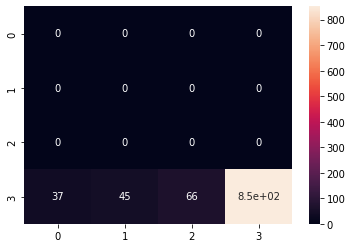

In [93]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train, y_train)
preds = logReg.predict(X_test)
logReg.score(X_test, y_test)

print(logReg.score(X_test, y_test))
rfcCM = confusion_matrix(preds, y_test)
sns.heatmap(rfcCM, annot=True)

0.237


<AxesSubplot:>

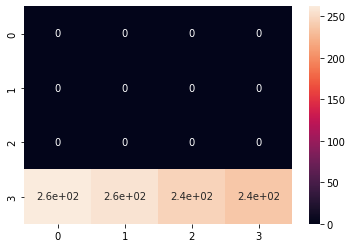

In [94]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(statX_train, staty_train)
preds = logReg.predict(statX_test)

print(logReg.score(statX_test, staty_test))
rfcCM = confusion_matrix(preds, staty_test)
sns.heatmap(rfcCM, annot=True)

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
features_poly = poly.fit_transform(features_notTitle)

0.925


<AxesSubplot:>

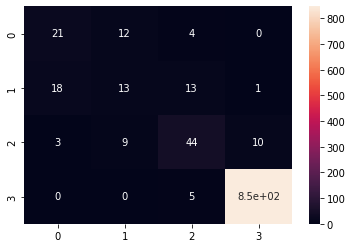

In [96]:
#RFC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
ax= plt.subplot()

clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))

rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.955


<AxesSubplot:>

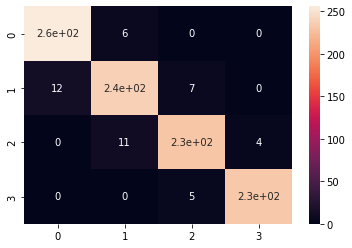

In [97]:
clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(statX_train, staty_train)
preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))

rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.852


<AxesSubplot:>

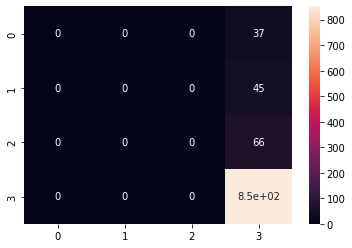

In [98]:
from sklearn.svm import SVC
clf= SVC(gamma='auto', C= 20)
clf.fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(accuracy_score(y_test, preds2))
rfcCM = confusion_matrix(y_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.237


<AxesSubplot:>

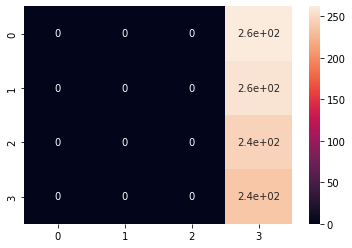

In [99]:
from sklearn.svm import SVC
clf= SVC(gamma=.12, C= .00001)
clf.fit(statX_train, staty_train)

preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))
rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)